# Chap05 - 오히려 큰 손해를 보시겠습니까?

# Would you rather lose an arm or a leg?

## 5.1 서론

> 어느 기상학자가 허리케인이	그가	사는	도시를	덮칠	확률을	예측하고	있다.	그는	95%	신뢰수준으로	허리케인이	
도시를	덮치지	않을	확률이	99~100%	사이라고	추정한다.	기상학자는	자신의	정확도에	매우	만족하며	재난	대피는	필요	없다고	시청에	권고하였다.	그러나	불행히도	허리케인은	도시를	덮쳤고,	도시는	물에	잠겼다.


> ***"정확하게 틀리는 것보다 대강 맞는 것이 더 낫다."***

## 5.2 손실함수 - Loss Functions

손실함수(loss function)에 대해 알아보자. 손실함수는 진짜(true) 모수의 함수이며 그 모수의 추정치다.

$$
L(\theta, \hat{\theta} ) = f(\theta, \hat{\theta})
$$

손실함수에서 중요한 점은 현재 추정치가 얼마나 나쁜지를 측정한다는 것이다. 손실함수의 값이 클수록, 추정치는 손실함수에 따라 더 나빠진다. 일반적인 손실함수의 예로는 **제곱오차손실(squared-error loss)** 이다.

$$
L\left(\theta, \hat{\theta}\right) = \left( \theta - \hat{\theta} \right)^{2}
$$

또한, 다음과 같이 비대칭 제곱오차손실함수(asymmetric squared-error loss function)도 있다.

$$
L\left(\theta, \hat{\theta} \right)=\begin{cases} \left(\theta - \hat{\theta} \right)^{2} \quad \hat{\theta} < \theta \\ c\left( \theta - \hat{\theta} \right)^{2} \quad \hat{\theta} \ge \theta, 0<c<1  \end{cases}
$$

위의 식은 진짜 모수보다 큰 값을 추정하는 것이 작은 값을 추정하는 것보다 낫다는 것을 보여준다. 예를 들어, 다음 달의 웹 트래픽을 추정하려는 경우 사용할 수 있는데, 여유있게 예상하여 서버 자원이 부족하게 배치되는 것을 피할 수 있기 때문이다.

**절대손실**(absolute-loss)함수는 오차가 선형적으로 증가하는 손실함수이다. 

$$
L \left( \theta, \hat{\theta} \right) = \left| \theta - \hat{\theta} \right|
$$

손실함수는 (1) 수학적 용이성과 (2) 적용할 때 결과값이 크게 영향을 받지 않는다.

### 5.2.1 현실 세계에서의 손실함수

베이지안 추론에서는 추론하고자 하는 (진짜) 모수가 사전/사후확률분포를 가진 확률변수라고 생각한다. 사후확률분포에서 뽑은 값은 모수의 참값이 될 수 있는 가능성이 있는 값이다. 따라서, 이러한 사후확률분포에서 **기대손실**(expected loss)를 계산한다. 기대손실은 사후확률분포에서 얻은 표본 한 개에 주어진 손실보다 참(true)손실에 대해 더 정확하게 추정한다.

먼저, **베이지안 점추정**(Bayesian point estimate)을 알아보자. 사후확률분포에서 하나의 값으로 집약 시킨 것이 베이지안 점추정량이다.

만약, $P(\theta | X)$ 가 데이터 $X$를 관측한 후 $\theta$의 사후확률분포라면 다음 함수는 **모수 $\theta$ 에 대해 추정치 $\hat{\theta}$를 선택하는 기대손실** 이라고 할 수 있다.

$$
l(\hat{\theta}) = E_{\theta} \left[ L(\theta, \hat{\theta}) \right] 
$$

[4장 - 큰 수의 법칙](https://github.com/ExcelsiorCJH/Bayesian-with-Python/blob/master/Chap04-TheGreatestTheoremNeverTold/Chap04-TheGreatestTheoremNeverTold.ipynb)에서 배웠듯이 사후확률분포에서 나온 $N$개의 표본 $\theta_i$, $i = 1, \dots , N$과 손실함수 $L$이 주어졌을 때 추정치 $\hat{\theta}$를 사용하여 기대손실을 근사화할 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ L(\theta_i, \hat{\theta} } \approx E_{\theta} \left[ L(\theta, \hat{\theta}) \right] = l(\hat{\theta})
$$

### 5.2.2 예제: 'The Price Is Right' 쇼케이스 최적화

'The Price Is Right' 쇼의 규칙은 다음과 같다.

1. 두 참가자가 쇼케이스에서 겨루게 된다.
2. 각 참가자는 각각 다른 구성의 상품을 보게 된다.
3. 상품을 관찰한 뒤 참가자는 자신들 앞에 놓인 상품의 가격을 써낸다.
4. 써낸 가격이 실제 가격보다 높다면 그 참가자는 탈락한다.
5. 써낸 가격이 실제 가격보다 $250 이내라면 참가자는 승리하고 상품을 경
품으로 받는다.

여기서는 아래와 같이 간단하게 실제 가격이 정규확률분포를 따른다고 가정하자. 

$$
\text{실제 가격} \sim \text{Normal}(\mu_p, \sigma_p)
$$

$\mu_p = 35,000$, $\sigma_p = 7,500$이라 하고, 상품의 가격에 대한 우리의 믿음이 정규확률분포를 따른다고 가정해보자.

$$
\text{Prize}_i \sim \text{Normal}(\mu_i, \sigma_i), \quad i=1,2
$$

이제 베이지안 분석을 통해 모수 $\mu_i$를 통해 공정한 가격이 얼마인지 예상하고, 모수 $\sigma_i$로 예상 가격의 불확실성을 표시할 수 있다. 여기서는 두 상품을 관찰하고 이에 대한 믿음(?)분포를 가지고 있단느 조건 하에 새로 업데이트된 진짜 가격을 구하고 싶다. `PyMC`를 사용하여 이를 구해보자.

관측된 상품이 다음과 같다고 가정하자.

1. 토론토 여행(Toronto)
2. 제설기(snowblower)

우리는 이 상품의 진짜 가격을 추측하지만, 추측에 대해 확신하지는 못한다. 이런 불확실성을 정규분포의 모수를 사용하여 표시할 수 있다. 

$$
\text{snowblower} \sim \text{Normal}(3000, 500)
$$

$$
\text{Toronto} \sim \text{Normal}(12000, 3000)
$$

예를 들어 토론토 여행의 진짜 가격이 12,000 달러라고 믿고 있다고 하고, $[9000, 15000]$사이에 있을 확률이 68.2%라고 해보자.

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib
matplotlib.rc('font', family='NanumGothic')

import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

Text(0.5,0,'가격')

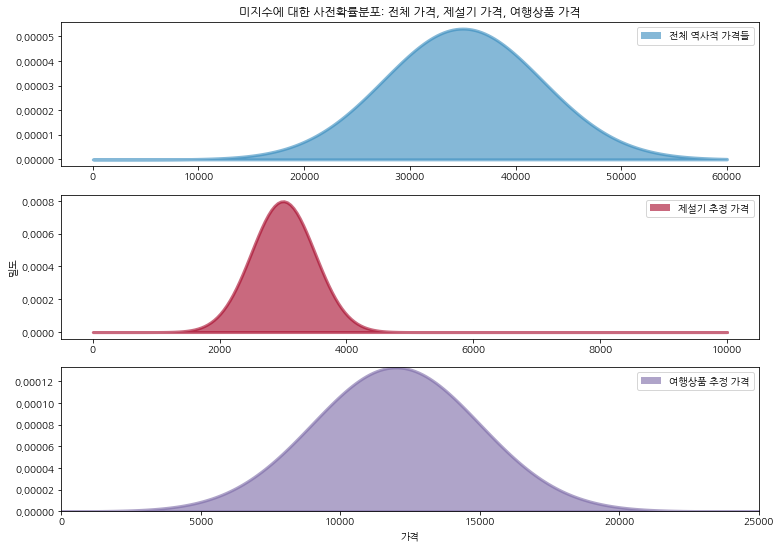

In [2]:
figsize(12.5, 9)
norm_pdf = stats.norm.pdf  # Normal Distribution

plt.subplot(311)
plt.title("미지수에 대한 사전확률분포: 전체 가격, 제설기 가격, 여행상품 가격");
x = np.linspace(0, 60000, 200)
sp1 = plt.fill_between(x, 0, norm_pdf(x, 35000, 7500),color="#348ABD", lw=3, alpha=0.6,
    label="전체 역사적 가격들")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.legend([p1], [sp1.get_label()])

plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x, 0, norm_pdf(x, 3000, 500),
    color="#A60628", lw=3, alpha=0.6,
    label="제설기 추정 가격")
p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])
#plt.xlabel("가격")
plt.ylabel("밀도")
plt.subplot(313)

x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x , 0, norm_pdf( x, 12000, 3000),color="#7A68A6", lw=3, alpha=0.6,
    label="여행상품 추정 가격")
plt.autoscale(tight=True)

p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])
plt.legend([p3], [sp3.get_label()])
plt.xlabel("가격")
#plt.ylabel("밀도")

In [3]:
import pymc as pm

In [9]:
data_mu = [3e3, 12e3]  # mu = [snowblower, toronto]
data_std = [5e2, 3e3]  # std = [snowblower, toronto]

mu_prior = 35e3  # 35000
std_prior = 75e2  # 7500
true_price = pm.Normal("true_price", mu_prior, 1.0 / std_prior ** 2)  # tau: precision

prize_1 = pm.Normal("first_prize", data_mu[0], 1.0 / data_std[0] ** 2)  # snowblower
prize_2 = pm.Normal("second_prize", data_mu[1], 1.0 / data_std[1] ** 2)  # toronto
price_estimate = prize_1 + prize_2

@pm.potential
def error(true_price=true_price, price_estimate=price_estimate):
    return pm.normal_like(true_price, price_estimate, 1 / (3e3) ** 2)

mcmc = pm.MCMC([true_price, prize_1, prize_2, price_estimate, error])
mcmc.sample(50000, 10000)

price_trace = mcmc.trace("true_price")[:]

 [-----------------100%-----------------] 50000 of 50000 complete in 8.4 sec

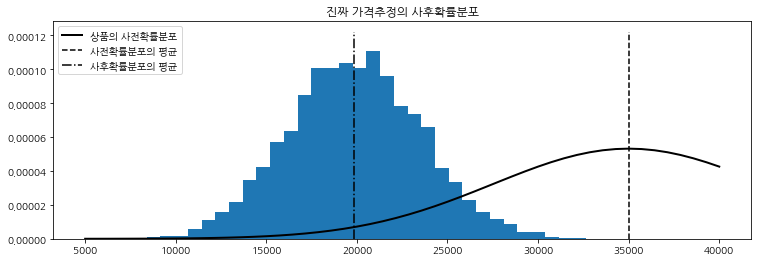

In [11]:
figsize(12.5, 4)
import scipy.stats as stats

# Plot the prior distribution.
# 사전확률분포를 Plotting한다.
x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c="k", lw=2,
    label="상품의 사전확률분포")

# Plot the posterior distribution, represented by samples from the MCMC.
# MCMC에서 얻은 표본이 대표하는 사후확률분포를 Plotting한다.
_hist = plt.hist(price_trace, bins=35, density=True, histtype="stepfilled")
plt.title("진짜 가격추정의 사후확률분포")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), label="사전확률분포의 평균",
    linestyles="--")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
    label="사후확률분포의 평균", linestyles="-.")
plt.legend(loc="upper left");